<a href="https://colab.research.google.com/github/Anikesh02/Colab-Files/blob/main/Image_Classification_using_CNN_with_cifar10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 3s 0us/step


(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [19]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [20]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [21]:
classes[9]

'truck'

In [11]:
def plot_sample(X, y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

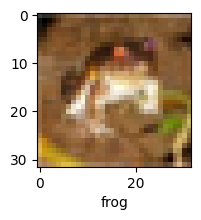

In [23]:
plot_sample(X_train, y_train, 0)

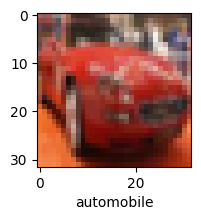

In [24]:
plot_sample(X_train, y_train, 5)

In [27]:
X_train = X_train / 255
X_test = X_test / 255

In [28]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 173s 110ms/step - loss: 1.8151 - accuracy: 0.3529
Epoch 2/5
1563/1563 [==============================] - 163s 104ms/step - loss: 1.6242 - accuracy: 0.4292
Epoch 3/5
1563/1563 [==============================] - 163s 104ms/step - loss: 1.5426 - accuracy: 0.4578
Epoch 4/5
1563/1563 [==============================] - 165s 105ms/step - loss: 1.4803 - accuracy: 0.4781
Epoch 5/5
1563/1563 [==============================] - 171s 109ms/step - loss: 1.4322 - accuracy: 0.4981


In [29]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 11s 33ms/step - loss: 1.5353 - accuracy: 0.4500


[1.5352510213851929, 0.44999998807907104]

In [32]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 9s 28ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.45      0.54      0.49      1000
           1       0.71      0.37      0.48      1000
           2       0.50      0.15      0.23      1000
           3       0.42      0.23      0.29      1000
           4       0.41      0.42      0.42      1000
           5       0.39      0.40      0.40      1000
           6       0.44      0.69      0.53      1000
           7       0.56      0.51      0.53      1000
           8       0.36      0.84      0.50      1000
           9       0.63      0.36      0.46      1000

    accuracy                           0.45     10000
   macro avg       0.49      0.45      0.43     10000
weighted avg       0.49      0.45      0.43     10000



In [35]:
cnn = models.Sequential([
        #cnn
        layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        #dense
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

In [36]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 72s 45ms/step - loss: 1.4531 - accuracy: 0.4793
Epoch 2/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.1070 - accuracy: 0.6117
Epoch 3/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9834 - accuracy: 0.6559
Epoch 4/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.9026 - accuracy: 0.6843
Epoch 5/10
1563/1563 [==============================] - 66s 43ms/step - loss: 0.8321 - accuracy: 0.7118
Epoch 6/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7718 - accuracy: 0.7343
Epoch 7/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7252 - accuracy: 0.7487
Epoch 8/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.6785 - accuracy: 0.7657
Epoch 9/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.6326 - accuracy: 0.7807
Epoch 10/10
1563/1563 [==============================] - 64s 41m

In [38]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 8s 24ms/step - loss: 0.9556 - accuracy: 0.6966


[0.955561637878418, 0.6966000199317932]

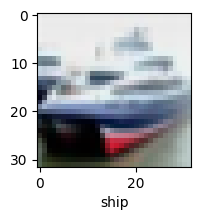

In [40]:
y_test = y_test.reshape(-1,)
plot_sample(X_test, y_test, 1)

In [43]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 9s 30ms/step


array([[1.9285537e-04, 1.7054731e-06, 2.3048154e-04, 8.9539433e-01,
        2.8034145e-05, 2.2348382e-02, 5.0958460e-03, 1.0309099e-03,
        7.5655445e-02, 2.2090479e-05],
       [7.9850266e-05, 5.0056189e-02, 2.6921350e-07, 1.2792043e-08,
        6.7525113e-10, 3.4079614e-11, 3.4847119e-09, 2.6338262e-10,
        9.4984120e-01, 2.2451797e-05],
       [4.9672775e-02, 4.5810243e-01, 7.2534400e-04, 3.4216570e-04,
        3.3198865e-04, 6.5088709e-05, 3.9380926e-04, 6.1264902e-05,
        4.8094210e-01, 9.3629826e-03],
       [9.8306870e-01, 1.1322769e-02, 9.5765555e-04, 1.2002308e-05,
        3.8822947e-04, 1.2324652e-07, 7.4794007e-06, 1.3584918e-05,
        4.1863876e-03, 4.2895103e-05],
       [2.8006341e-06, 9.9681429e-06, 2.4570741e-03, 2.0467790e-02,
        1.2132624e-01, 2.0762887e-03, 8.5364771e-01, 3.0760500e-06,
        8.7819426e-06, 2.7982486e-07]], dtype=float32)

In [47]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [48]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

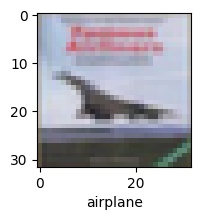

In [57]:
plot_sample(X_test, y_test, 3)

In [58]:
classes[y_classes[3]]

'airplane'

In [60]:
print("Classification report: \n", classification_report(y_test, y_classes))

Classification report: 
               precision    recall  f1-score   support

           0       0.77      0.69      0.73      1000
           1       0.77      0.87      0.82      1000
           2       0.58      0.57      0.58      1000
           3       0.55      0.46      0.50      1000
           4       0.64      0.65      0.64      1000
           5       0.59      0.63      0.61      1000
           6       0.67      0.85      0.75      1000
           7       0.87      0.62      0.73      1000
           8       0.80      0.83      0.82      1000
           9       0.74      0.78      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000

